In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("movies.csv")

In [8]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


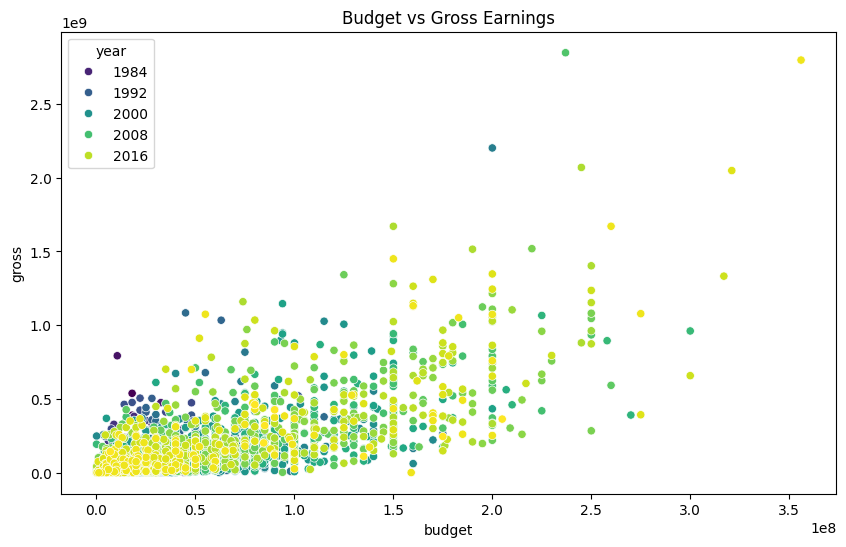

In [9]:
# Scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='gross', hue='year', palette='viridis')
plt.title('Budget vs Gross Earnings')
plt.show()

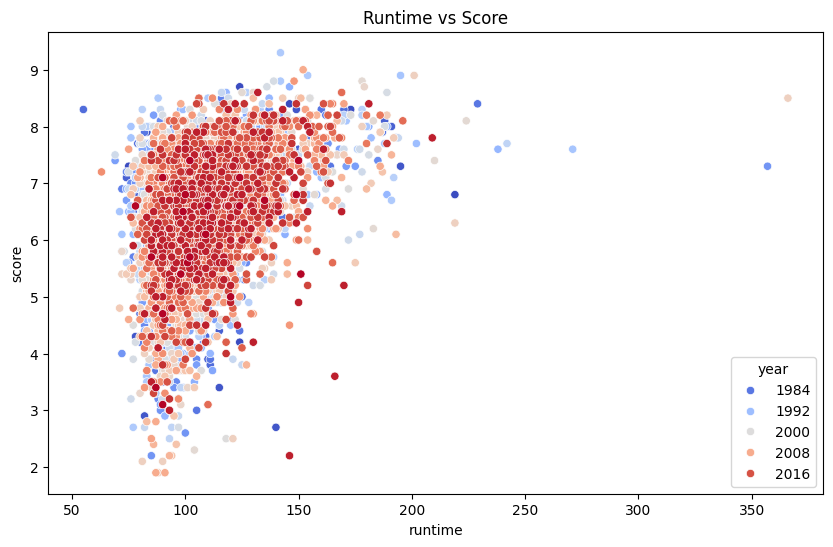

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='runtime', y='score', hue='year', palette='coolwarm')
plt.title('Runtime vs Score')
plt.show()


Analysis: Genre and Running Time
genre
Action       110.211268
Adventure    107.978923
Animation     92.204142
Biography    119.880361
Comedy       101.491759
Crime        111.752727
Drama        112.974934
Family        99.909091
Fantasy       99.363636
History       55.000000
Horror        96.304348
Music        117.000000
Musical      145.000000
Mystery      115.750000
Romance      106.600000
Sci-Fi       100.300000
Sport         94.000000
Thriller      98.625000
Western       97.333333
Name: runtime, dtype: float64


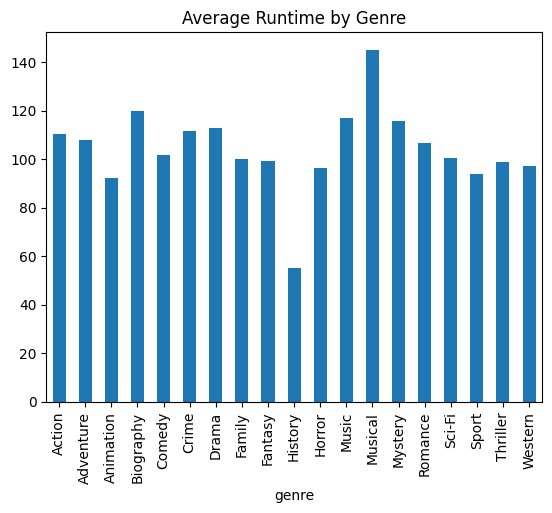

In [13]:
# Genre and Running Time
print("\nAnalysis: Genre and Running Time")
genre_runtime = df.groupby('genre')['runtime'].mean()
print(genre_runtime)
genre_runtime.plot(kind='bar', title='Average Runtime by Genre')
plt.show()

Mostly genres like Action, Adventure, Biography, Comedy, Crime, Drama, Musical, Mystery, Romance have the most running times than 100 minutes.


Analysis: Budget and Running Time


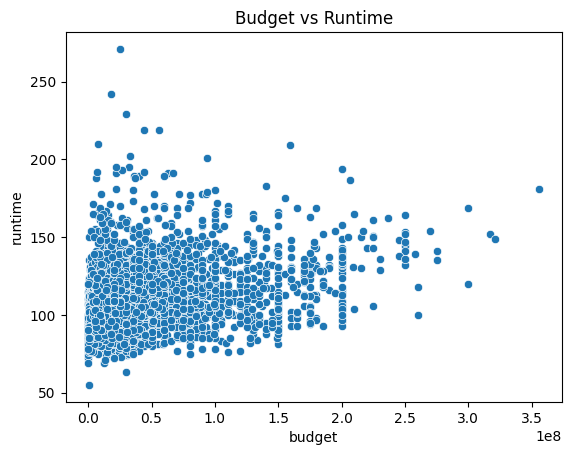

In [14]:
# Budget and Running Time
print("\nAnalysis: Budget and Running Time")
sns.scatterplot(data=df, x='budget', y='runtime')
plt.title('Budget vs Runtime')
plt.show()



Analysis: Genre and Country
genre                           Action  Adventure  Animation  Biography  \
country                                                                   
Argentina                          NaN        1.0        NaN        NaN   
Aruba                              1.0        NaN        NaN        NaN   
Australia                         19.0       10.0        2.0        7.0   
Austria                            1.0        NaN        NaN        NaN   
Belgium                            1.0        NaN        NaN        1.0   
Brazil                             1.0        NaN        NaN        NaN   
Canada                            30.0       10.0        8.0        8.0   
Chile                              NaN        NaN        NaN        1.0   
China                             20.0        3.0        4.0        2.0   
Colombia                           NaN        NaN        NaN        NaN   
Czech Republic                     3.0        1.0        NaN        2.0

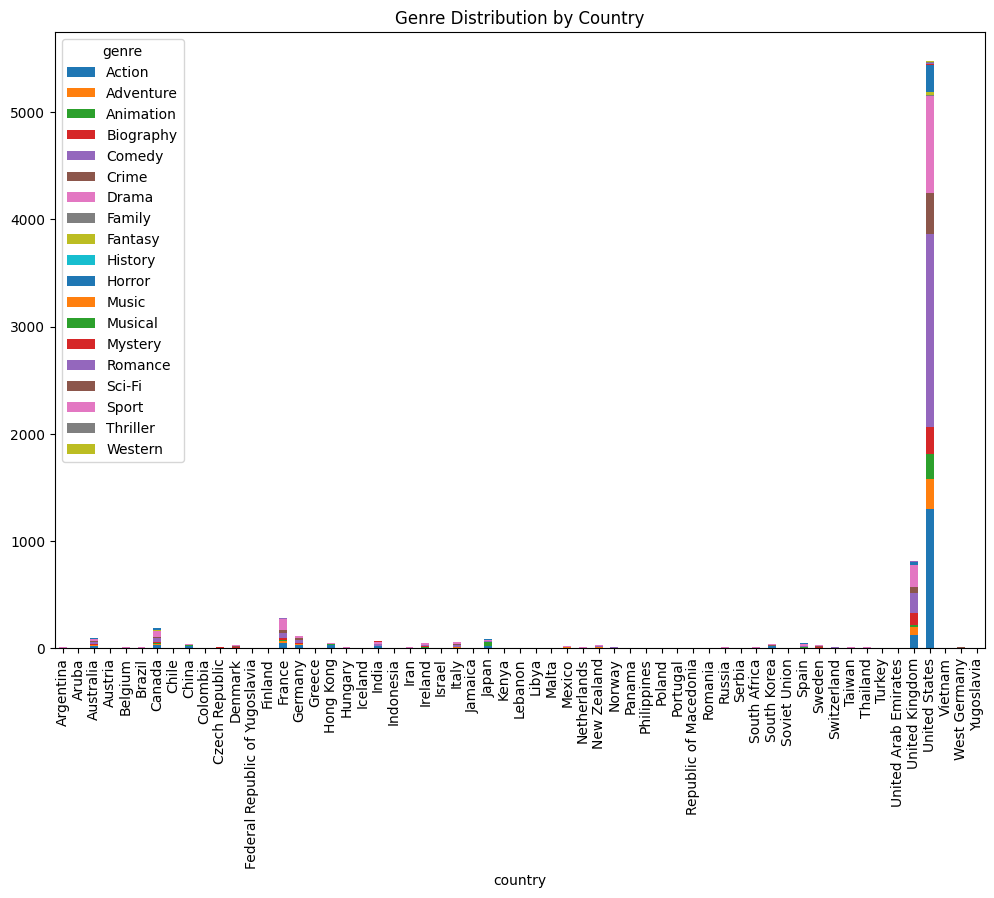

In [15]:
# Genre and Country
print("\nAnalysis: Genre and Country")
genre_country = df.groupby(['country', 'genre']).size().unstack()
print(genre_country)
genre_country.plot(kind='bar', stacked=True, figsize=(12, 8), title='Genre Distribution by Country')
plt.show()

In [16]:
# Convert non-numeric columns to numeric where possible
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

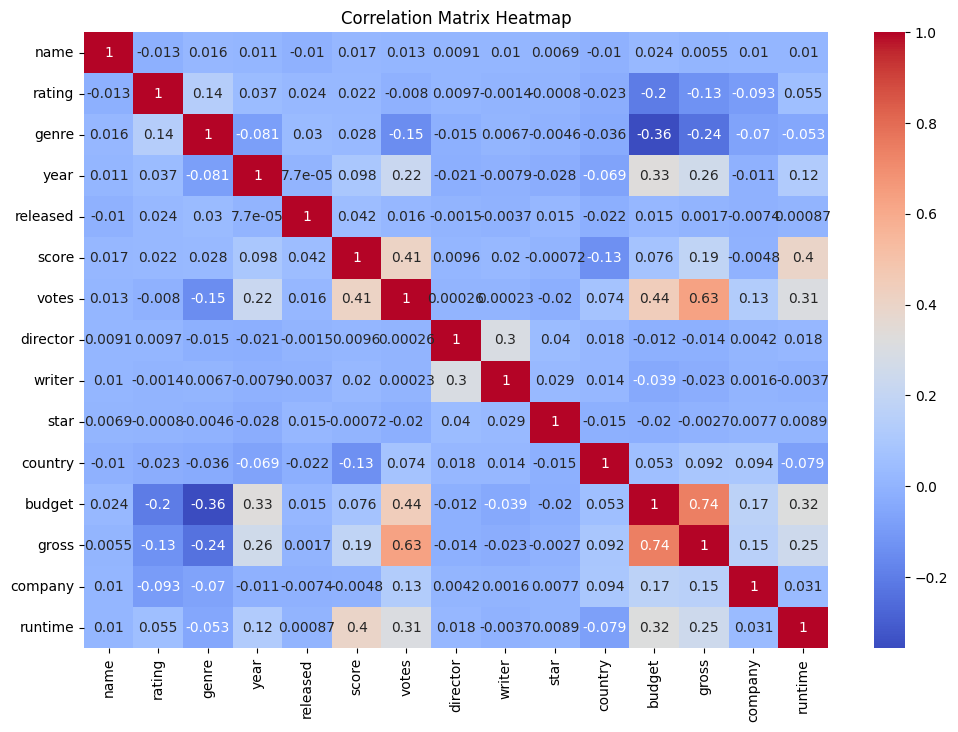

Correlation Matrix:
              name    rating     genre      year  released     score  \
name      1.000000 -0.013161  0.016355  0.011453 -0.010480  0.017097   
rating   -0.013161  1.000000  0.137018  0.037372  0.024148  0.022385   
genre     0.016355  0.137018  1.000000 -0.081261  0.030429  0.027965   
year      0.011453  0.037372 -0.081261  1.000000  0.000077  0.097995   
released -0.010480  0.024148  0.030429  0.000077  1.000000  0.042148   
score     0.017097  0.022385  0.027965  0.097995  0.042148  1.000000   
votes     0.013088 -0.007970 -0.145307  0.222945  0.016154  0.409182   
director  0.009079  0.009701 -0.015258 -0.020795 -0.001526  0.009559   
writer    0.010026 -0.001399  0.006747 -0.007894 -0.003745  0.019804   
star      0.006861 -0.000801 -0.004601 -0.027944  0.015464 -0.000721   
country  -0.010400 -0.023496 -0.035765 -0.069300 -0.021627 -0.134642   
budget    0.023970 -0.204940 -0.356564  0.329321  0.014683  0.076254   
gross     0.005533 -0.129644 -0.235650  0.25

In [17]:
# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)
